In [106]:
import pandas as pd

In [107]:
data = pd.read_csv('la-crimes-sample.csv')

In [108]:
print('Rows count:', len(data.index))

Rows count: 39608


In [109]:
print('Columns count:', len(data.columns))

Columns count: 27


In [110]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [111]:
print('+{0:-^25}+{1:-^13}+{2:-^21}+{3:-^12}+'.format("","","",""))
print(color.BOLD + '|{0:^25}|{1:^13}|{2:^21}|{3:^12}|'.format("Column Name","Column Type","Column Unique Value","Null Count") + color.END)
print('+{0:-^25}+{1:-^13}+{2:-^21}+{3:-^12}+'.format("","","",""))
for column in data.columns:
    print('|{0:25}|{1:^13}|{2:^21}|{3:^12}|'.format(column,str(data[column].dtype),len(data[column].unique()),data[column].isna().sum()))
    print('+{0:-^25}+{1:-^13}+{2:-^21}+{3:-^12}+'.format("","","",""))

+-------------------------+-------------+---------------------+------------+
|       Column Name       | Column Type | Column Unique Value | Null Count |
+-------------------------+-------------+---------------------+------------+
|Unnamed: 0               |    int64    |        39608        |     0      |
+-------------------------+-------------+---------------------+------------+
|DR Number                |    int64    |        39608        |     0      |
+-------------------------+-------------+---------------------+------------+
|Date Reported            |   object    |        2809         |     0      |
+-------------------------+-------------+---------------------+------------+
|Date Occurred            |   object    |        2808         |     0      |
+-------------------------+-------------+---------------------+------------+
|Time Occurred            |    int64    |         900         |     0      |
+-------------------------+-------------+---------------------+------------+

<AxesSubplot:title={'center':'Victims by Sex'}, xlabel='Sex', ylabel='Count of victims'>

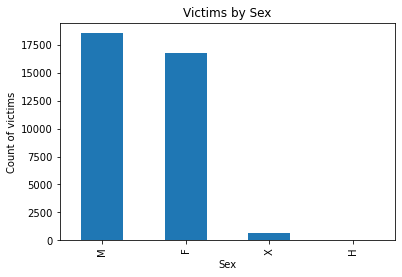

In [112]:
victims_by_sex = data['Victim Sex'].value_counts()
victims_by_sex.plot(kind='bar', title='Victims by Sex', xlabel='Sex', ylabel='Count of victims')
#Чаще жертвами оказываются мужчины.

<AxesSubplot:title={'center':'Victims by Age'}, xlabel='Age', ylabel='Count of victims'>

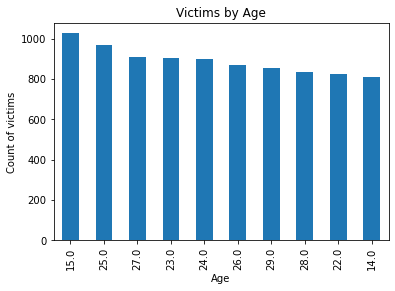

In [113]:
victims_by_age = data['Victim Age'].value_counts()
victims_by_age.iloc[:10].plot(kind='bar', title='Victims by Age', xlabel='Age', ylabel='Count of victims')
#Больше всего жертв в возрасте 15 лет.

In [114]:
male = data[data['Victim Sex']=='M']
female = data[data['Victim Sex']=='F']

29.0    433
25.0    423
27.0    415
32.0    406
28.0    403
Name: Victim Age, dtype: int64

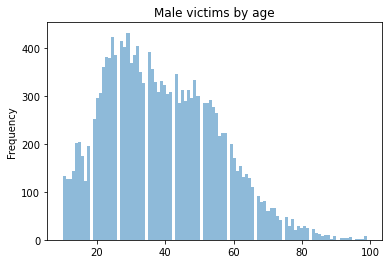

In [115]:
male['Victim Age'].plot.hist(bins=100, alpha=0.5, title='Male victims by age')
male['Victim Age'].value_counts().head() 
#Мужчины в возрасте 29 лет чаще становятся жертвами.

25.0    543
23.0    523
24.0    515
27.0    496
26.0    481
Name: Victim Age, dtype: int64

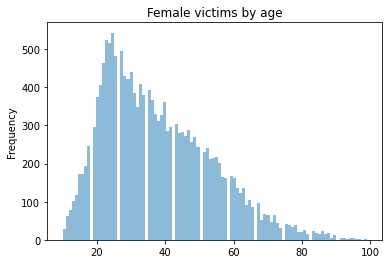

In [116]:
female['Victim Age'].plot.hist(bins=100, alpha=0.5, title='Female victims by age')
female['Victim Age'].value_counts().head() 
#Женщины в возрасте 25 лет чаще становятся жертвами.

In [117]:
ten_most_common_crimes = data['Crime Code Description'].value_counts().iloc[:10]
ten_most_common_crimes

BATTERY - SIMPLE ASSAULT                                        3581
VEHICLE - STOLEN                                                3048
BURGLARY FROM VEHICLE                                           3038
BURGLARY                                                        2938
THEFT PLAIN - PETTY ($950 & UNDER)                              2866
THEFT OF IDENTITY                                               2522
INTIMATE PARTNER - SIMPLE ASSAULT                               2147
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114    2027
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                        1759
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                  1656
Name: Crime Code Description, dtype: int64

<AxesSubplot:title={'center':'Ten most common crimes'}, xlabel='Crime label', ylabel='Count of victims'>

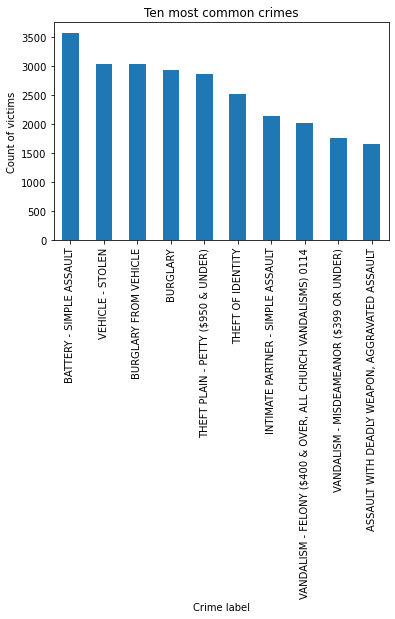

In [118]:
ten_most_common_crimes.plot(kind='bar', title='Ten most common crimes', xlabel='Crime label', ylabel='Count of victims')

In [119]:
#Самые распространенные преступления над мужчинами.
male['Crime Code Description'].value_counts().head()

BATTERY - SIMPLE ASSAULT              1731
BURGLARY FROM VEHICLE                 1665
BURGLARY                              1632
THEFT PLAIN - PETTY ($950 & UNDER)    1499
THEFT OF IDENTITY                     1262
Name: Crime Code Description, dtype: int64

In [120]:
#Самые распространенные преступления над женщинами.
female['Crime Code Description'].value_counts().head()

BATTERY - SIMPLE ASSAULT              1838
INTIMATE PARTNER - SIMPLE ASSAULT     1764
BURGLARY FROM VEHICLE                 1361
THEFT PLAIN - PETTY ($950 & UNDER)    1294
THEFT OF IDENTITY                     1251
Name: Crime Code Description, dtype: int64

<AxesSubplot:title={'center':'Victim Descent'}, xlabel='Descent', ylabel='Count of victims'>

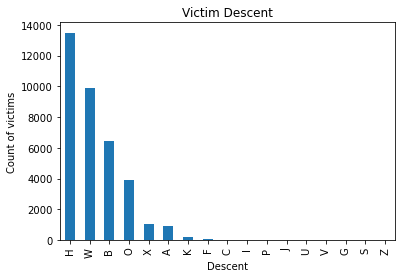

In [121]:
victim_descent = data['Victim Descent'].value_counts()
victim_descent.plot(kind='bar', title='Victim Descent', xlabel='Descent', ylabel='Count of victims')
#Больше всего жертв среди испаноязычного и мексиканского населения.

In [122]:
areas = data['Area Name'].value_counts()
areas

77th Street    2752
Southwest      2633
N Hollywood    2192
Pacific        2100
Southeast      2086
Mission        2008
Northeast      1918
Van Nuys       1896
Devonshire     1873
Hollywood      1861
Newton         1806
Topanga        1762
Olympic        1758
Harbor         1724
West Valley    1683
Central        1652
West LA        1645
Rampart        1628
Wilshire       1587
Hollenbeck     1552
Foothill       1492
Name: Area Name, dtype: int64

<AxesSubplot:title={'center':'Danger areas'}>

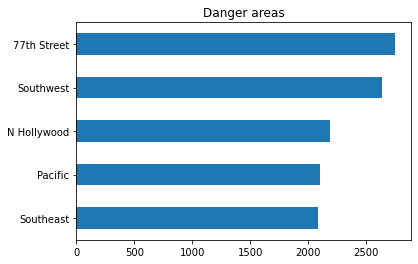

In [123]:
danger_areas = areas[:5].sort_values().plot(kind='barh',title='Danger areas')
danger_areas

<AxesSubplot:title={'center':'Safe areas'}>

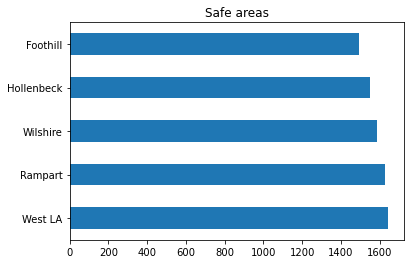

In [124]:
safe_areas = areas[-5:].plot(kind='barh',title='Safe areas')
safe_areas

In [126]:
#Жертвы в каждом районе в зависимости от происхождения.
unique_areas = pd.unique(data['Area Name'])
unique_areas
most_often_crimes_in_each_area = []
for i in range(len(unique_areas)):
    row_of_most_victim_descent = data[data['Area Name']==unique_areas[i]]['Victim Descent'].value_counts()[:1]
    most_often_crimes_in_each_area.append({ 
        'Area' : unique_areas[i],
        'Victim Descent' : row_of_most_victim_descent.index.values[0],
        'Victim Descent Count' : row_of_most_victim_descent[0]
    })
pd.DataFrame(most_often_crimes_in_each_area).sort_values(by='Victim Descent Count', ascending=False)

,Area,Victim Descent,Victim Descent Count
5,77th Street,B,1314
10,Southwest,B,1107
1,Mission,H,1086
19,Newton,H,999
12,Pacific,W,975
11,Hollenbeck,H,969
14,N Hollywood,W,949
20,Southeast,B,914
13,West LA,W,851
8,Rampart,H,848
